In [1]:
import sys
sys.path.append('../../Emulator')
import emulator
import numpy as np
import scipy.sparse as sp
import time
from matplotlib import pyplot as plt

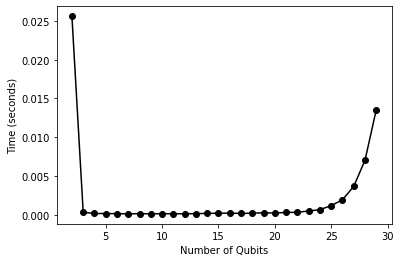

In [2]:
# Define the number of times to repeat the following experiment.
M = 100

# Set the maximum number of qubits to simulate.
N = 29

# Create a list of various numbers of qubits <= N to simulate.
num_qubits = np.arange(2, N+1, 1)

# Define a list to hold the emulator and simulator times respectively.
em_times = []

# For each iteration of the experiment:
for m in range(M):
    
    # Define arrays to hold the results of this iteration (batch).
    em_batch = []

    # Define a matrix (U) and an eigenvector.
    z = np.random.uniform(0, 1)
    U = np.array([[1, 0], [0, np.exp(1j*z)]])
    phi = np.array([0, 1])
    
    # For each number of qubits:
    for n in num_qubits:
        
        # Perform the QFT with the emulator and time how long it takes.
        start_time = time.time()
        x = emulator.qpe(U, phi, n)
        em_batch.append(time.time() - start_time)
        
        # Verify that there is, in fact, only a single nonzero entry at all times.
        if np.count_nonzero(x) != 1:
            print("False")

    # Append the batch results to the main array.
    em_times.append(em_batch)
      
# Average the times over each batch to get the average time for each operation.
em_times = np.array(em_times)
em_times = np.sum(em_times, axis=0)/M

# Plot the times for each QPE operation.
plt.plot(num_qubits, em_times, 'o-k')   
plt.xlabel('Number of Qubits')
plt.ylabel('Time (seconds)')
plt.savefig('em_qpe.png', dpi=600)
plt.show()

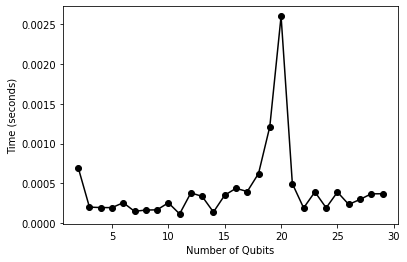

In [5]:
# Define the number of times to repeat the following experiment.
M = 100

# Set the maximum number of qubits to simulate.
N = 29

# Create a list of various numbers of qubits <= N to simulate.
num_qubits = np.arange(2, N+1, 1)

# Define a list to hold the emulator and simulator times respectively.
em_times = []

# For each iteration of the experiment:
for m in range(M):
    
    # Define arrays to hold the results of this iteration (batch).
    em_batch = []

    # Define a matrix (U) and an eigenvector.
    z = np.random.uniform(0, 1)
    U = np.array([[1, 0], [0, np.exp(1j*z)]])
    phi = np.array([0, 1])
    
    # For each number of qubits:
    for n in num_qubits:
        
        # Perform the QFT with the emulator and time how long it takes.
        start_time = time.time()
        x = emulator.qpe(U, phi, n)
        em_batch.append(time.time() - start_time)

    # Append the batch results to the main array.
    em_times.append(em_batch)
      
# Average the times over each batch to get the average time for each operation.
em_times = np.array(em_times)
em_times = np.sum(em_times, axis=0)/M

# Plot the times for each QPE operation.
plt.plot(num_qubits, em_times, 'o-k')   
plt.xlabel('Number of Qubits')
plt.ylabel('Time (seconds)')
plt.savefig('em_qpe.png', dpi=600)
plt.show()

In [3]:
def sparse_qpe(U, phi, b):
    """
    Performs quantum phase estimation on the matrix U with eigenvector |phi>
    such that U|phi>=e^{2*pi*i/theta}|phi>.

    Args:
        U (ndarray):    An NxN unitary operator.
        phi (ndarray):  An Nx1 eigenvector of U.
        b (int):        The number of qubits to use on the counting register.

    Returns:
        ndarray:        An approimation of the (2^b)*theta such that 
                        U|phi>=e^{2*pi*i/theta}|phi>. It is returned as a (2^b)x1
                        quantum state vector approximation.
    """
    
    # Assert that U is a square matrix of size NxN where N=2^n for some n.
    m, n = U.shape
    if m != n or np.log2(n) % 1 != 0:
        raise ValueError('U must be an NxN unitary matrix where N=2^n for some integer n.')
    
    # Get the eigenvalue (phase) corresponding to the given eigenvector phi.
    evals, evecs = np.linalg.eig(U)
    indx = list(filter(lambda x: np.allclose(evecs[x, :], phi), range(len(evecs))))
    phase = evals[indx[0]]
    
    # Compute the theta such that e^{2*pi*i/theta}=phase.
    theta = np.log(phase)/(2*np.pi*1j)
    
    # Multiply theta by 2^b, round the result, and convert it to an int.
    theta = int(np.round(theta.real * (2**b)))
    
    # Create a state of size 2^b with state[theta]=1. Return that state.
    state = sp.dok_matrix((2**b, 1), dtype=complex)
    state[theta] = 1
    return state

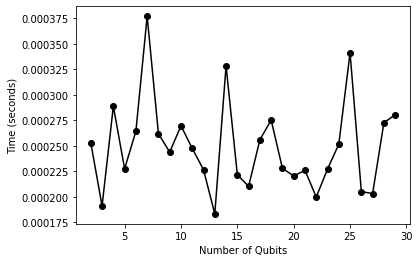

In [4]:
# Define the number of times to repeat the following experiment.
M = 100

# Set the maximum number of qubits to simulate.
N = 29

# Create a list of various numbers of qubits <= N to simulate.
num_qubits = np.arange(2, N+1, 1)

# Define a list to hold the emulator and simulator times respectively.
em_times = []

# For each iteration of the experiment:
for m in range(M):
    
    # Define arrays to hold the results of this iteration (batch).
    em_batch = []

    # Define a matrix (U) and an eigenvector.
    z = np.random.uniform(0, 1)
    U = np.array([[1, 0], [0, np.exp(1j*z)]])
    phi = np.array([0, 1])
    
    # For each number of qubits:
    for n in num_qubits:
        
        # Perform the QFT with the emulator and time how long it takes.
        start_time = time.time()
        sparse_qpe(U, phi, n)
        em_batch.append(time.time() - start_time)
        
        # if m == 1:
        #     print("n =", n, ":", np.count_nonzero(x), x.shape)

    # Append the batch results to the main array.
    em_times.append(em_batch)
      
# Average the times over each batch to get the average time for each operation.
em_times = np.array(em_times)
em_times = np.sum(em_times, axis=0)/M

# Plot the times for each QPE operation.
plt.plot(num_qubits, em_times, 'o-k')   
plt.xlabel('Number of Qubits')
plt.ylabel('Time (seconds)')
plt.savefig('em_qpe.png', dpi=600)
plt.show()